### ETAS: Japan 2021
#### 13 February 2021, m=7.x
Time: 2021-02-13 06:07:48 (UTC-08:00)

Time
2021-02-13 06:07:48 (UTC-08:00)
Location
37.720°N 141.762°E
Depth
35.0 km

In [14]:
#
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import datetime as dtm
import matplotlib.dates as mpd
import pytz
tzutc = pytz.timezone('UTC')

#import operator
import math
import random
import numpy
import scipy
import scipy.optimize as spo
from scipy import interpolate
import itertools
import sys
#import scipy.optimize as spo
import os
import operator
#from PIL import Image as ipp
import multiprocessing as mpp
#
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import json
import pickle
#
import geopy.distance
#from geopy.distance import vincenty
#from geopy.distance import great_circle
#
#import shapely.geometry as sgp
#
#from mpl_toolkits.basemap import Basemap as Basemap
import cartopy
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from geographiclib.geodesic import Geodesic as ggp
#
#import ANSStools as atp
from yodiipy import ANSStools as atp
#
import contours2kml
import globalETAS as gep
import global_etas_auto as ggep
from eq_params import *
#
from nepal_figs import *
import optimizers
#
import random
import geopy



In [16]:
# import numba
# import numba.errors
# print('**** ', numba.__version__)
# from numba.errors import NumbaDeprecationWarning
# from numba.errors import NumbaPendingDepricationWarning
# import warnings

# warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
# warnings.simplefilter('ignore', categorey=NumbaPendingDepricationWarning)


In [17]:
# event was some time on the 24th or maybe late the 23rd. this, plus defaults, should find the event:
#to_dt = dtm.datetime(2016,8,25, tzinfo=pytz.timezone('UTC'))
to_dt = dtm.datetime.now(pytz.timezone('UTC'))
#
Lr_factor = 10.
# define these from the t_now in the actual etas object, in the event that we load it from pickle,
#  rather than calc it here.
#f_path = '/home/myoder/Dropbox/Research/etas/italy_2016_10/etas_{}'.format(to_dt)
#f_root = 'etas_2016'
#
# USGS:
# Time
# 2016-11-21 20:59:49 (UTC)
# Location
# 37.392°N 141.403°E
# Depth
# 11.3 km

t0 = dtm.datetime(2021, 2, 13, 6, 7, 48, tzinfo=pytz.timezone('UTC'))
t_ms = t0
to_dt = dtm.datetime.now(pytz.utc)
#Location
lat0 = 37.720
lon0 = 141.762
m0 = 7.1
d_lat=4.
d_lon=4.
lats = [lat0-d_lat, lat0+d_lat]
lons = [lon0-d_lon, lon0+d_lon]
event_name = 'Honshu_2021_02_13'
#to_dt = t0-dtm.timedelta(hours=2)
#to_dt = dtm.datetime.now(pytz.utc)
#
#etas = ggep.auto_etas(to_dt=to_dt, Lr_factor=Lr_factor, dt_0=5)
#italy_prams = {'do_recarray': True, 'D_fract': 1.5,
#                't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
#                't_now':to_dt, 
#                'lats': [42.,43.5], 'p': 1.1, 'b1': 1.0, 'mc': 2.5, 'q': 1.5,
#                'lons': [12.,15.], 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
#                'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76}
eq_prams = {'do_recarray': True, 'D_fract': 1.5,
               't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
               't_now':to_dt, 
               'lats': lats, 'p': 1.1, 'b1': 1.0, 'mc': 2.5, 'q': 1.5,
               'lons': lons, 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
               'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76, 'etas_range_padding':.5*(d_lat+d_lon)}
#
n_cpu=2

In [18]:
incat = gep.make_ETAS_catalog_mpp(atp.ANSS_Comcat_catalog(min_lon=lons[0], max_lon=lons[1], min_lat=lats[0], max_lat=lats[1],
                                m_c = eq_prams['mc'], from_date=t0-dtm.timedelta(days=4000),
                                to_date=to_dt, Nmax=None).as_recarray(), n_cpu=n_cpu )

etas_prams:  {'incat': None, 'lats': [32.0, 38.0], 'lons': [-117.0, -114.0], 'mc': 2.5, 'date_range': [datetime.datetime(1990, 1, 1, 0, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2021, 2, 16, 22, 44, 44, 589703, tzinfo=<UTC>)], 'D_fract': 1.5, 'd_lambda': 1.76, 'd_tau': 2.28, 'fit_factor': 1.5, 'p': 1.1, 'q': 1.5, 'dmstar': 1.0, 'b1': 1.0, 'b2': 1.5, 'do_recarray': False}
results fetched.


In [19]:
print('*** ', os.environ['HOME'])

***  /home/yoder


In [20]:
#nz_cat0 = test_cat = atp.cat_from_geonet(lats=lats, lons=lons, m_c=2.5, date_from=dtm.datetime(2000,1,1,tzinfo=atp.tzutc),
#                              date_to=dtm.datetime.now(atp.tzutc))
#nz_cat = gep.make_ETAS_catalog_mpp(incat=nz_cat0)

# n_cpu=2*mpp.cpu_count()

#etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), catalog=nz_cat, **eq_prams)
etas = gep.ETAS_mpp(n_cpu=n_cpu, catalog=incat, **eq_prams)
#
# we've run this; we can reload it from pickle:
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas = pickle.load(fin)
#
#
# TODO: do this with os.path.join() for win, etc. compatibility.
f_path = '{}/Dropbox/Research/etas/{}/etas_{}'.format(os.environ['HOME'], event_name,etas.t_now)
f_root = 'etas_{}'.format(event_name)

begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2011-02-19 22:46:02.880014+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 9391], None)
make_etas():
etas_mpp worker xyz_range:  [0, 3200]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2011-02-19 22:46:02.880014+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 9391], [0, 3200])
etas_mpp worker xyz_range:  [3200, 6400]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2011-02-19 22:46:02.880014+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 9391], [3200, 6400])
begin make_etas_rtree()
** len(self.ETAS_array)[169684] = 3200
begin make_etas_rtree()
** len(self.ETAS_array)[169687] = 3200
now gather sub-arrays...
Indices initiat

/home/yoder/Dropbox/Research/globalETAS/globalETAS.py:1383: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "omori_rate" failed type inference due to: non-precise type pyobject
During: typing of argument at /home/yoder/Dropbox/Research/globalETAS/globalETAS.py (1401)

File "globalETAS.py", line 1401:
	def omori_rate(self, t=None, t_to=None, p=None):
     <source elided>
		#print("inputs: ", t, lon, lat, p, q)
		t = (t or mpd.date2num(dtm.datetime.now(pytz.timezone('UTC'))))
  ^

  @numba.jit
/home/yoder/Dropbox/Research/globalETAS/globalETAS.py:1383: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "omori_rate" failed type inference due to: non-precise type pyobject
During: typing of argument at /home/yoder/Dropbox/Research/globalETAS/globalETAS.py (1401)

File "globalETAS.py", line 1401:
	def omori_rate(self, t=None, t_to=None, p=None):
     <source elided>
		#print("inputs: ", t, lo

[169687]: finished calculateing ETAS (rtree). wrap up in recarray and return.
etas complete (from mpp_rtree run() loop); now pipe back([0, 9391])
[169684]: finished calculateing ETAS (rtree). wrap up in recarray and return.
etas complete (from mpp_rtree run() loop); now pipe back([0, 9391])
ETAS complete.


In [21]:
#print(etas.t0, etas.t_now, etas.t_forecast, etas.catalog[-1])
print(to_dt)
print(etas.t_0, mpd.num2date(etas.t_forecast), etas.t_now, t_ms)
#print(etas.catalog[-5:])

2021-02-16 22:46:02.880014+00:00
2011-02-19 22:46:02.880014+00:00 2021-02-16 22:46:02.880014+00:00 2021-02-16 22:46:02.880014+00:00 2021-02-13 06:07:48+00:00


ms:  ('2021-02-13T14:07:50.397000', 37.7453, 141.7494, 7.1, 49.94, 18671.58877774, 61.65950019, 1277.03847158, 1.40581446e-05, 18.62087137, 165.68091867, 0.00150686, 1., 1.1, 1.5, 26.80175629, [0.3131965 , 0.17170972], [[ 0.77578768, -0.63099403], [ 0.63099403,  0.77578768]], 1887.) 141.7494 37.7453


/home/yoder/Dropbox/Research/globalETAS/globalETAS.py:377: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(etas_contours, cax=None, ax=ax, cmap=map_cmap)


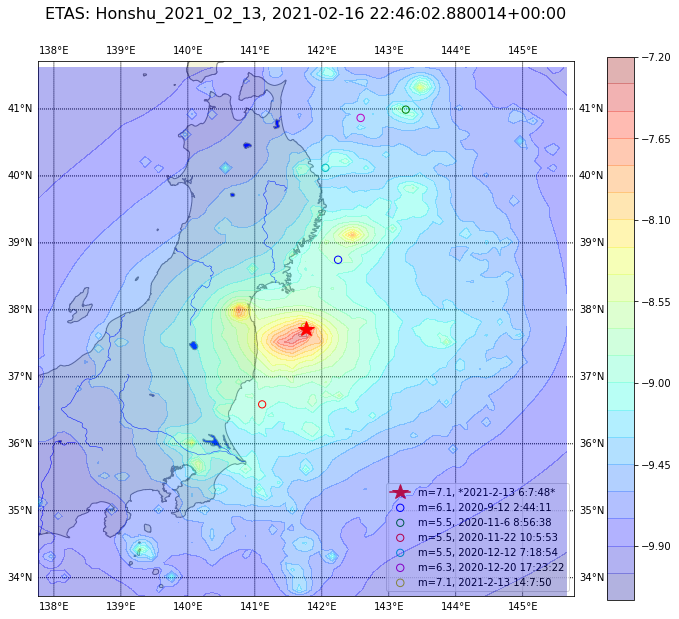

In [22]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)
#
#mainshock = sorted(etas.catalog, key=lambda rw: rw['mag'])[-1]
#print('mainshock: ', mainshock)
# get mainshock. it's an m>6 event in the last week or so... this is subjective.
# if we just look for the biggest event, we get the L'Aquila event, so we'll need to be more creative...
# or just specify it.

mainshock = etas.catalog[-1]
for j,eq in enumerate(reversed(etas.catalog)):
    #print('*** ', pytz.utc.localize(eq['event_date'].astype(dtm.datetime)))
    if pytz.utc.localize(eq['event_date'].astype(dtm.datetime))<etas.t_now-dtm.timedelta(days=180): break
    if eq['mag']>mainshock['mag']:
        mainshock = eq
        #
    #
#
print('ms: ', mainshock, mainshock['lon'], mainshock['lat'])
x,y = etas.cm(mainshock['lon'], mainshock['lat'])

#print('mm: ', max(etas.catalog['mag']))


#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>t_ms-dtm.timedelta(days=180)]

# plot mainshock:
dt = mainshock['event_date'].astype(dtm.datetime)
dt=t0
dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
#etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
#                   label='m={}, {}'.format(mainshock['mag'], dt_str))
etas.cm.plot([lon0], [lat0], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={}, *{}*'.format(m0, dt_str))

ax.set_title('ETAS: {}, {}\n\n'.format(event_name, etas.t_now), size=16)
for j,m6 in enumerate(m6s):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, 
                          c='none', marker='o', zorder=11, label='m={}, {}'.format(m6['mag'], dt_str))
    #
plt.gca().legend(loc='lower right')

<ipython-input-23-cc09cc326bb1>:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax1 = plt.subplot('211')
<ipython-input-23-cc09cc326bb1>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax2 = plt.subplot('212', sharex=ax1)


Text(0, 0.5, 'magnitudes $m$')

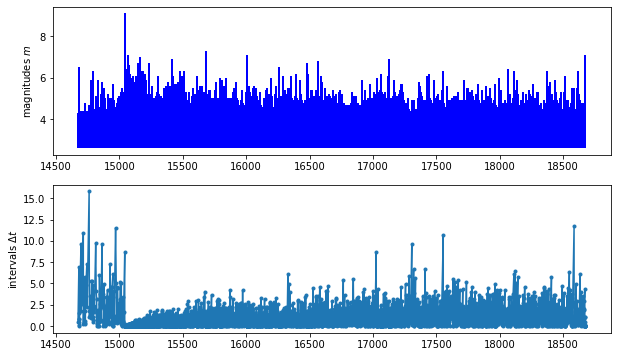

In [23]:
plt.figure(figsize=(10,6))
plt.clf()
ax1 = plt.subplot('211')
ax2 = plt.subplot('212', sharex=ax1)
#ax1.plot(etas.catalog['event_date'], etas.catalog['mag'], marker='.', ls='-', label='mag')
f_dates = [mpd.date2num(x.astype(dtm.datetime)) for x in etas.catalog['event_date']]
ax1.vlines(f_dates, (min(etas.catalog['mag'])-.5)*numpy.ones(len(etas.catalog)), 
           etas.catalog['mag'], lw=2., label='mag', color='b')
ax2.plot(f_dates[1:], numpy.diff(f_dates,1), '.-')

ax2.set_ylabel('intervals $\Delta t$')
ax1.set_ylabel('magnitudes $m$')

/home/yoder/Dropbox/Research/globalETAS/globalETAS.py:377: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(etas_contours, cax=None, ax=ax, cmap=map_cmap)


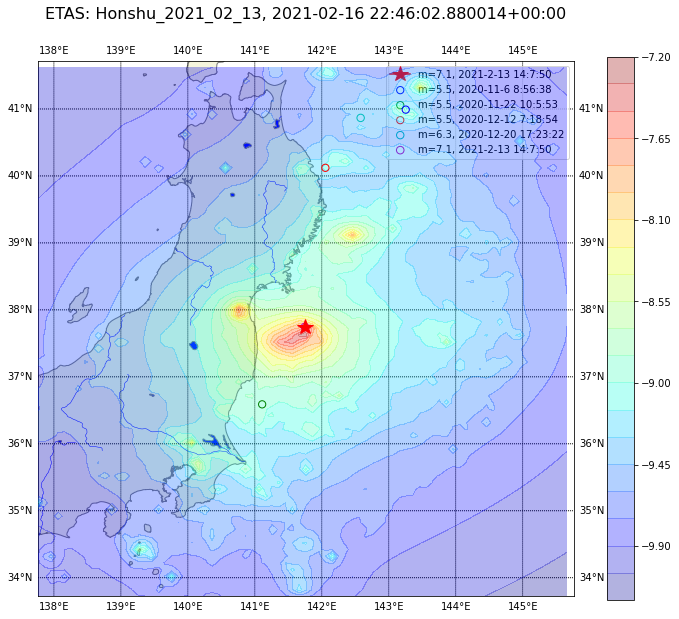

In [24]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)

#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5 
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>to_dt-dtm.timedelta(days=120)]
#
# plot mainshock:
dt = mainshock['event_date'].astype(dtm.datetime)
etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={}, {}'.format(mainshock['mag'], dt_str))
ax.set_title('ETAS: {}, {}\n\n'.format(event_name, etas.t_now), size=16)
for j,m6 in enumerate(m6s):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, 
                          c='none', marker='o', zorder=11, label='m={}, {}'.format(m6['mag'], dt_str))
    #
plt.gca().legend(loc=0)

In [25]:
print(['{},{}\n'.format(rw['event_date'], rw['mag'] ) for rw in etas.catalog if rw['mag'] >= 5.5])
len(['{},{}\n'.format(rw['event_date'], rw['mag'] ) for rw in etas.catalog if rw['mag'] >= 5.5
     and rw['event_date'].astype(dtm.datetime)>dtm.datetime(2016,10,20)])



['2010-03-13T12:46:26.380000,5.6\n', '2010-03-14T08:08:03.960000,6.5\n', '2010-06-13T03:32:57.240000,5.9\n', '2010-07-04T21:55:51.980000,6.3\n', '2010-08-10T05:50:37.540000,5.9\n', '2010-09-13T05:47:47.290000,5.8\n', '2010-09-29T08:00:00.500000,5.5\n', '2010-12-06T07:30:32.710000,5.7\n', '2011-02-15T19:01:03.400000,5.5\n', '2011-03-09T02:45:20.330000,7.3\n', '2011-03-09T02:57:16.670000,5.7\n', '2011-03-09T02:58:14.080000,5.7\n', '2011-03-09T04:37:04.990000,5.6\n', '2011-03-09T18:16:16.440000,6.0\n', '2011-03-09T18:44:38.500000,5.9\n', '2011-03-09T21:22:17.580000,6.0\n', '2011-03-09T21:24:01.680000,6.5\n', '2011-03-10T08:08:20.560000,5.6\n', '2011-03-11T05:46:24.120000,9.1\n', '2011-03-11T05:54:31.940000,6.3\n', '2011-03-11T05:55:45.480000,6.4\n', '2011-03-11T05:58:07.490000,6.3\n', '2011-03-11T05:59:31.580000,5.9\n', '2011-03-11T06:00:39.300000,6.2\n', '2011-03-11T06:03:55.260000,5.9\n', '2011-03-11T06:05:02.230000,5.8\n', '2011-03-11T06:06:13.170000,6.3\n', '2011-03-11T06:07:20.880000

38

In [26]:
for rw in m6s:
    print(rw)

('2020-11-06T08:56:38.063000', 40.9903, 143.255, 5.5, 12., 18572.37266277, 9.77237221, 24.65575277, 0.00402783, 2.95120923, 2.25219416, 0.0922018, 1., 1.1, 1.5, 3.72409196, [0.00813143, 0.00376862], [[ 0.95686024,  0.29054858], [-0.29054858,  0.95686024]], 23.)
('2020-11-22T10:05:53.849000', 36.5889, 141.1105, 5.5, 33., 18588.42076214, 9.77237221, 24.65575277, 0.00402783, 2.95120923, 2.25219416, 0.0922018, 1., 1.1, 1.5, 3.72409196, [0.00826004, 0.00534223], [[ 0.99793526,  0.06422786], [-0.06422786,  0.99793526]], 64.)
('2020-12-12T07:18:54.231000', 40.1213, 142.0551, 5.5, 44., 18608.30479434, 9.77237221, 24.65575277, 0.00402783, 2.95120923, 2.25219416, 0.0922018, 1., 1.1, 1.5, 3.72409196, [0.00817683, 0.00460258], [[ 0.86092435, -0.50873301], [ 0.50873301,  0.86092435]], 25.)
('2020-12-20T17:23:22.668000', 40.8667, 142.5814, 6.3, 35., 18616.72456792, 24.54708916, 177.44392024, 0.00023796, 7.41310241, 19.31697691, 0.01178708, 1., 1.1, 1.5, 9.99060584, [0.0539524 , 0.02993524], [[ 0.975

In [27]:
f_path = '{}/Dropbox/Research/etas/{}/etas_{}'.format(os.environ['HOME'], event_name,etas.t_now)
f_root = 'etas_{}'.format(event_name)
#
etas.export_kml(os.path.join(f_path, '{}_{}.kml'.format(f_root, str(etas.t_now).replace(' ', '_'))))
etas.export_xyz(os.path.join(f_path, '{}_{}.xyz'.format(f_root, str(etas.t_now).replace(' ', '_'))))
fg.savefig(os.path.join(f_path, '{}_{}.png'.format(f_root, str(etas.t_now).replace(' ', '_'))))

with open (os.path.join(f_path, '{}_{}.pkl'.format(f_root, str(etas.t_now).replace(' ', '_'))), 'wb') as fpkl:
    pickle.dump(etas, fpkl)


kml bottom, top:  0 20


<ipython-input-28-a96633b908f4>:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax1=plt.subplot('121')
<ipython-input-28-a96633b908f4>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax2=plt.subplot('122')


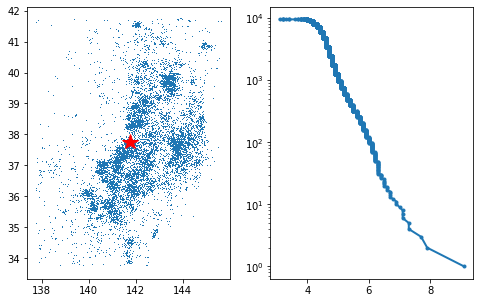

In [28]:
plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(etas.catalog['lon'], etas.catalog['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(etas.catalog['mag']))], numpy.arange(1,len(etas.catalog)+1),
         '.-', lw=2.)
ax2.set_yscale('log')

In [16]:
#print(etas.mc, etas.mc_etas)

In [17]:
# plot a cross-section of ETAS. let's get smart about this and do a PCA on the xyz field...
#
#plt.figure()
##my_xy = [[x,y,z] for x,y in zip(etas.catalog['lon'], etas['lat']) if x>=42.25 and x<=42.75]
#my_xyz = [[x,y,z] for x,y,z in etas.ETAS_array if y>=42.25 and y<=42.75]
#plt.figure(figsize=(8,6))
#plt.plot([x for x,y,z in my_xyz ], [z for x,y,z in my_xyz], '.')